Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# my toolzzzzzzz
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [0]:
# read in data from 538's github repo
df_538 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [35]:
df_538.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
df_538['timestamp'] = pd.to_datetime(df_538['timestamp'])

In [0]:
df_538.set_index('timestamp', inplace=True)

In [0]:
lastday = df_538['2017-08-29']

In [0]:
lastday_filtered = lastday[lastday['category']=='IMDb users']

In [40]:
lastday_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final = lastday_filtered.tail(1)

In [43]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [44]:
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


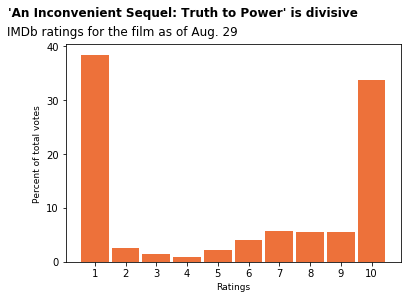

In [50]:
# figure
fig, ax = plt.subplots()

#background color
fig.patch.set(facecolor='white')

# bars
ax.bar(x=range(1, 11), height=plot_data['percent'], width=0.9, color='#ED713A')

# Axes background color
ax.set(facecolor='white')

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29', fontsize=12, x=-1.85, y=42)

# set the x and y lables
ax.set_xlabel('Ratings', fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)

# fix the x and y axis tick marks and grid
ax.set_xticklabels(range(1, 11), rotation=0)
ax.set_xticks(range(1, 11))
ax.set_yticklabels(range(0, 50, 10))
ax.set_yticks(range(0, 50, 10));

In [111]:
# BOB ROSS GRAPH

paint_df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')
paint_df.head()

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [121]:
paint_df['APPLE_FRAME'].value_counts().sort_index()

0    402
1      1
Name: APPLE_FRAME, dtype: int64

In [148]:
paint_df.sum()

EPISODE            S01E01S01E02S01E03S01E04S01E05S01E06S01E07S01E...
TITLE              "A WALK IN THE WOODS""MT. MCKINLEY""EBONY SUNS...
APPLE_FRAME                                                        1
AURORA_BOREALIS                                                    2
BARN                                                              17
                                         ...                        
WAVES                                                             34
WINDMILL                                                           1
WINDOW_FRAME                                                       1
WINTER                                                            69
WOOD_FRAMED                                                        1
Length: 69, dtype: object

In [157]:
paint_df['TREE'].sum()

361

In [155]:
paint_df['WAVES'].sum()

34

In [156]:
paint_df['SUN'].sum()

40

In [160]:
corr_matrix=paint_df.corr()
corr_matrix

,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,CABIN,CACTUS,CIRCLE_FRAME,CIRRUS,CLIFF,CLOUDS,CONIFER,CUMULUS,DECIDUOUS,DIANE_ANDRE,DOCK,DOUBLE_OVAL_FRAME,FARM,FENCE,FIRE,FLORIDA_FRAME,FLOWERS,FOG,FRAMED,GRASS,GUEST,HALF_CIRCLE_FRAME,HALF_OVAL_FRAME,HILLS,LAKE,LAKES,LIGHTHOUSE,MILL,MOON,MOUNTAIN,MOUNTAINS,NIGHT,OCEAN,OVAL_FRAME,PALM_TREES,PATH,PERSON,PORTRAIT,RECTANGLE_3D_FRAME,RECTANGULAR_FRAME,RIVER,ROCKS,SEASHELL_FRAME,SNOW,SNOWY_MOUNTAIN,SPLIT_FRAME,STEVE_ROSS,STRUCTURE,SUN,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
APPLE_FRAME,1.000000,-0.003522,-0.010467,-0.013365,-0.003522,0.375133,1.000000,-0.032478,-0.022669,-0.004994,-0.003522,-0.013629,-0.007098,-0.044585,-0.052546,-0.025978,0.043917,-0.002488,-0.002488,-0.002488,-0.002488,-0.012551,-0.002488,-0.002488,-0.008738,-0.012270,0.128169,-0.036788,-0.011985,-0.002488,-0.002488,-0.010784,0.067252,NaN,-0.002488,-0.003522,-0.004319,-0.040471,-0.028462,-0.008355,-0.015621,-0.016093,-0.007538,-0.018556,-0.002488,-0.004319,-0.002488,-0.002488,-0.033638,-0.024239,-0.002488,-0.023850,-0.030369,-0.002488,-0.008355,0.096470,-0.016556,-0.002488,0.017012,0.022072,-0.002488,-0.016326,-0.015140,-0.002488,-0.002488,-0.022669,-0.002488
AURORA_BOREALIS,-0.003522,1.000000,-0.014821,-0.018925,-0.004988,-0.009390,-0.003522,-0.045988,0.155379,-0.007071,-0.004988,-0.019298,-0.010051,-0.063131,0.067033,-0.036784,-0.009010,-0.003522,-0.003522,-0.003522,-0.003522,-0.017772,-0.003522,-0.003522,-0.012372,-0.017375,-0.027482,-0.052091,-0.016970,-0.003522,-0.003522,-0.015270,0.095227,NaN,-0.003522,-0.004988,-0.006116,0.014864,-0.040302,0.421589,-0.022119,-0.022787,-0.010674,-0.026275,-0.003522,-0.006116,-0.003522,-0.003522,-0.047631,-0.034323,-0.003522,0.147689,0.036492,-0.003522,-0.011830,0.050043,-0.023443,-0.003522,0.024089,0.031254,-0.003522,-0.023117,-0.021437,-0.003522,-0.003522,0.155379,-0.003522
BARN,-0.010467,-0.014821,1.000000,-0.056237,-0.014821,-0.027902,-0.010467,-0.109660,-0.095385,-0.021012,-0.014821,0.039756,-0.029866,-0.013686,-0.097481,-0.018916,0.110119,-0.010467,-0.010467,-0.010467,-0.010467,0.312330,-0.010467,-0.010467,-0.036765,0.001585,-0.008611,0.000256,-0.050429,-0.010467,-0.010467,0.014384,-0.104035,NaN,-0.010467,-0.014821,0.125439,-0.170289,-0.119760,0.040607,-0.065728,0.016771,-0.031718,0.224110,-0.010467,-0.018174,-0.010467,-0.010467,-0.114910,-0.070592,-0.010467,0.153400,-0.127782,-0.010467,-0.035155,0.345396,0.012908,-0.010467,0.031179,-0.040559,-0.010467,-0.068693,-0.063703,0.237660,-0.010467,0.134011,-0.010467
BEACH,-0.013365,-0.018925,-0.056237,1.000000,0.122310,-0.035628,-0.013365,-0.152792,-0.121798,-0.026831,-0.018925,0.004843,0.317623,0.259819,-0.262442,0.151116,-0.264309,-0.013365,-0.013365,-0.013365,-0.013365,-0.025496,-0.013365,0.186123,-0.046945,-0.065927,0.013190,-0.135328,-0.064393,-0.013365,-0.013365,0.086198,-0.198733,NaN,-0.013365,-0.018925,-0.023207,-0.197158,-0.152922,0.016021,0.855598,0.015422,0.429673,-0.099698,-0.013365,-0.023207,-0.013365,-0.013365,-0.180731,0.298931,0.186123,-0.128139,-0.140822,-0.013365,-0.044889,-0.138543,0.176590,-0.013365,-0.688180,-0.578704,-0.013365,-0.087714,0.847090,-0.013365,-0.013365,-0.121798,-0.013365
BOAT,-0.003522,-0.004988,-0.014821,0.122310,1.000000,-0.009390,-0.003522,-0.045988,-0.032099,-0.007071,-0.004988,-0.019298,-0.010051,0.079002,-0.074404,0.049402,-0.009010,-0.003522,0.706227,-0.003522,-0.003522,-0.017772,-0.003522,-0.003522,-0.012372,-0.017375,0.077001,0.021827,-0.016970,-0.003522,-0.003522,0.155673,0.021426,NaN,-0.003522,-0.004988,-0.006116,-0.057306,-0.040302,-0.011830,0.101685,0.098044,-0.010674,-0.026275,-0.003522,-0.006116,-0.003522,-0.003522,-0.047631,-0.034323,-0.003522,-0.033770,-0.043001,-0.003522,-0.011830,0.050043,0.094652,-0.003522,-0.091480,-0.159583,-0.003522,-0.023117,0.105610,-0.003522,-0.003522,-0.032099,-0.003522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

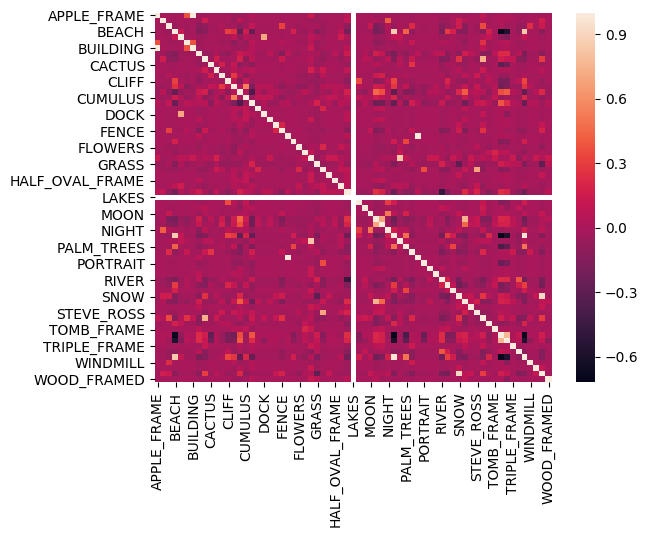

In [161]:
sns.heatmap(corr_matrix);

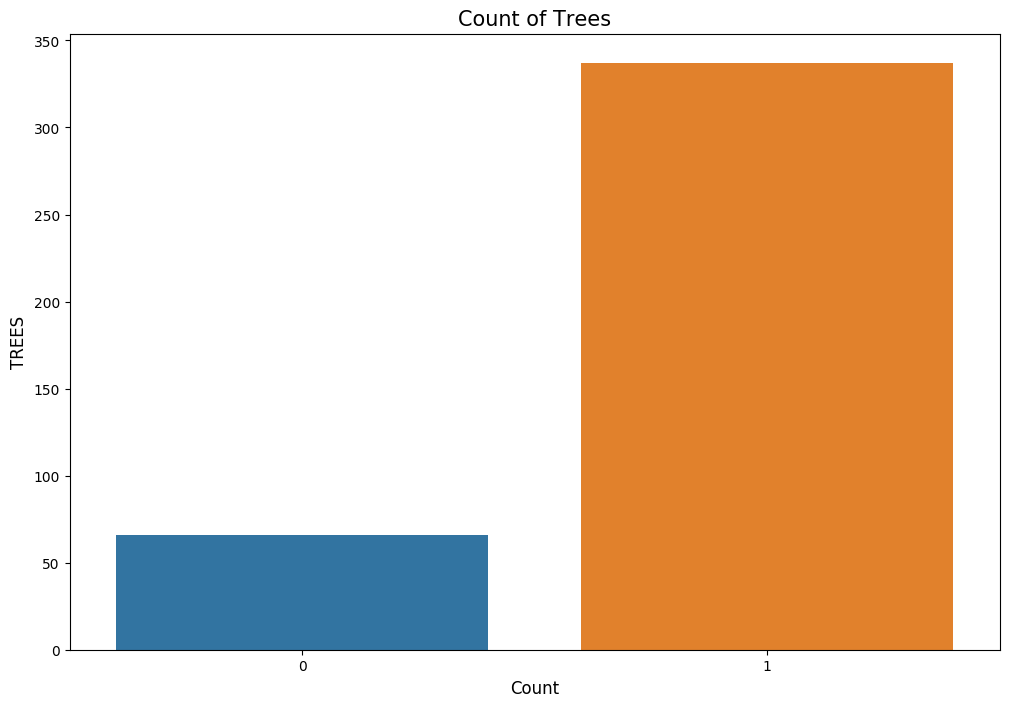

In [165]:
plt.figure(figsize=(12,8))
sns.countplot(x='TREES', data=paint_df)
plt.xlabel('Count', fontsize=12)
plt.ylabel('TREES', fontsize=12)
plt.title('Count of Trees', fontsize=15)
plt.show();

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here